# Testing SVMs for MNIST dataset

In [1]:
import sys

sys.path.append("./src")

In [2]:
import numpy as np
import mnist_loader
import mnist
from sklearn import svm

In [8]:
training_data, validation_data, test_data = mnist_loader.load_data()

images_training=mnist.get_images(training_data)
images_training_vals=training_data[1]

images_test=mnist.get_images(test_data)

## Show some digits

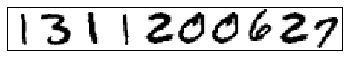

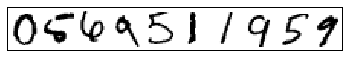

In [23]:
trn_rndsel=np.random.randint(images_training[0].shape[0], size=10).tolist()
tst_rndsel=np.random.randint(images_test[0].shape[0], size=10).tolist()

mnist.plot_images_together([images_training[ind] for ind in trn_rndsel])
mnist.plot_images_together([images_test[ind] for ind in tst_rndsel ])

## Train vanilla SVM
Might take a while with the full dataset
Select a subset for convenience

In [12]:
#SVM test
span=1000

training_sel_nums=training_data[0][:span]
training_sel_vals=training_data[1][:span]

In [13]:
# train
clf = svm.SVC()
clf.fit(training_sel_nums, training_sel_vals)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
# test
predictions = [int(a) for a in clf.predict(test_data[0])]
num_correct = sum(int(a == y) for a, y in zip(predictions, test_data[1]))

print "%s of %s values correct. %s%%" % (num_correct, len(test_data[1]), num_correct*100/len(test_data[1]))

8267 of 10000 values correct. 82%


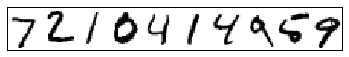

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [17]:
mnist.plot_images_together(images_test[:10])

predictions[:10]
test_data[1][:10]
